In [1]:
#! /home/rajat1/anaconda3/envs/col865/bin/pip install pytorch-tabnet

In [2]:
#! /home/rajat1/anaconda3/envs/col865/bin/pip install --pre torch torchvision --extra-index-url https://download.pytorch.org/whl/nightly/cu113

### Reading the dataset

In [3]:
f1 = open("dataset1/dataset.arff")

### Removing the unwanted lines

In [4]:
line = f1.readline()

i = 0
while(line):
    line = f1.readline()
    if i==48:
        break
    
    i+=1

### Reading the actual dataset

In [5]:
dataset_tmp = []
dataset_tmp.append(line[:-1])

while line:
    line = f1.readline()
    
    if line == '':
        break
    
    dataset_tmp.append(line[:-1])


In [6]:
print("length of the dataset", len(dataset_tmp))

length of the dataset 2916697


In [7]:
print(dataset_tmp[-1])

3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e,2018,330,144,0.0739724122705657,6800,0,2,112350000,white


In [8]:
dataset= []

for i in dataset_tmp:
    dataset.append(i.strip().split(','))

In [9]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install pandas

In [10]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install numpy

In [11]:
import pandas as pd
import numpy as np

In [12]:
dataset_np = np.array(dataset)

In [13]:
dataset_np.shape

(2916697, 10)

In [14]:
dataset_np

array([['111K8kZAEnJg245r2cM6y9zgJGHZtJPy6', '2017', '11', ..., '2',
        '100050000', 'princetonCerber'],
       ['1123pJv8jzeFQaCV4w644pzQJzVWay2zcA', '2016', '132', ..., '1',
        '100000000', 'princetonLocky'],
       ['112536im7hy6wtKbpH1qYDWtTyMRAcA2p7', '2016', '246', ..., '2',
        '200000000', 'princetonCerber'],
       ...,
       ['1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw', '2018', '330', ..., '35',
        '2398267286', 'white'],
       ['15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a', '2018', '330', ..., '1',
        '178042670', 'white'],
       ['3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e', '2018', '330', ..., '2',
        '112350000', 'white']], dtype='<U34')

In [15]:
for i in range(dataset_np.shape[1]):
    print("Unique values in column",i+1,":",len(list(set(dataset_np[:,i]))))

Unique values in column 1 : 2631095
Unique values in column 2 : 8
Unique values in column 3 : 365
Unique values in column 4 : 73
Unique values in column 5 : 785669
Unique values in column 6 : 11572
Unique values in column 7 : 10168
Unique values in column 8 : 814
Unique values in column 9 : 1866365
Unique values in column 10 : 29


In [16]:
dataset_without_id=np.delete(dataset_np,0, axis=1)

In [17]:
dataset_without_id

array([['2017', '11', '18', ..., '2', '100050000', 'princetonCerber'],
       ['2016', '132', '44', ..., '1', '100000000', 'princetonLocky'],
       ['2016', '246', '0', ..., '2', '200000000', 'princetonCerber'],
       ...,
       ['2018', '330', '2', ..., '35', '2398267286', 'white'],
       ['2018', '330', '0', ..., '1', '178042670', 'white'],
       ['2018', '330', '144', ..., '2', '112350000', 'white']],
      dtype='<U34')

In [18]:
dataset_without_id.shape

(2916697, 9)

### Spliting the dataset to test and train

### 1. checking the number of classes

In [19]:
classes = list(set(dataset_without_id[:,8]))
print(len(classes))
classes

29


['montrealCryptoTorLocker2015',
 'montrealFlyper',
 'princetonLocky',
 'montrealJigSaw',
 'montrealDMALocker',
 'montrealGlobeImposter',
 'montrealDMALockerv3',
 'paduaJigsaw',
 'montrealXLockerv5.0',
 'montrealGlobe',
 'montrealSamSam',
 'montrealAPT',
 'paduaCryptoWall',
 'montrealCryptXXX',
 'montrealCryptoLocker',
 'montrealWannaCry',
 'montrealEDA2',
 'montrealXLocker',
 'montrealNoobCrypt',
 'white',
 'montrealSam',
 'princetonCerber',
 'montrealCryptConsole',
 'montrealGlobev3',
 'montrealVenusLocker',
 'montrealRazy',
 'montrealComradeCircle',
 'paduaKeRanger',
 'montrealXTPLocker']

### 2. Checking the distribution of classes

In [20]:
classes_dic = {}

tmp = dataset_without_id[:,8]


for i in tmp:
    if i not in classes_dic.keys():
        classes_dic[i] = 1
    else:
        classes_dic[i]+=1

In [21]:
classes_dic

{'princetonCerber': 9223,
 'princetonLocky': 6625,
 'montrealCryptoLocker': 9315,
 'montrealCryptXXX': 2419,
 'paduaCryptoWall': 12390,
 'montrealWannaCry': 28,
 'montrealDMALockerv3': 354,
 'montrealCryptoTorLocker2015': 55,
 'montrealSamSam': 62,
 'montrealFlyper': 9,
 'montrealNoobCrypt': 483,
 'montrealDMALocker': 251,
 'montrealGlobe': 32,
 'montrealEDA2': 6,
 'paduaKeRanger': 10,
 'montrealVenusLocker': 7,
 'montrealXTPLocker': 8,
 'paduaJigsaw': 2,
 'montrealGlobev3': 34,
 'montrealJigSaw': 4,
 'montrealXLockerv5.0': 7,
 'montrealXLocker': 1,
 'montrealRazy': 13,
 'montrealCryptConsole': 7,
 'montrealGlobeImposter': 55,
 'montrealSam': 1,
 'montrealComradeCircle': 1,
 'montrealAPT': 11,
 'white': 2875284}

In [22]:
!  /home/srajat/anaconda3/envs/col865/bin/pip install matplotlib

dict_keys(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker', 'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry', 'montrealDMALockerv3', 'montrealCryptoTorLocker2015', 'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt', 'montrealDMALocker', 'montrealGlobe', 'montrealEDA2', 'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker', 'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw', 'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy', 'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam', 'montrealComradeCircle', 'montrealAPT', 'white'])
dict_values([9223, 6625, 9315, 2419, 12390, 28, 354, 55, 62, 9, 483, 251, 32, 6, 10, 7, 8, 2, 34, 4, 7, 1, 13, 7, 55, 1, 1, 11, 2875284])


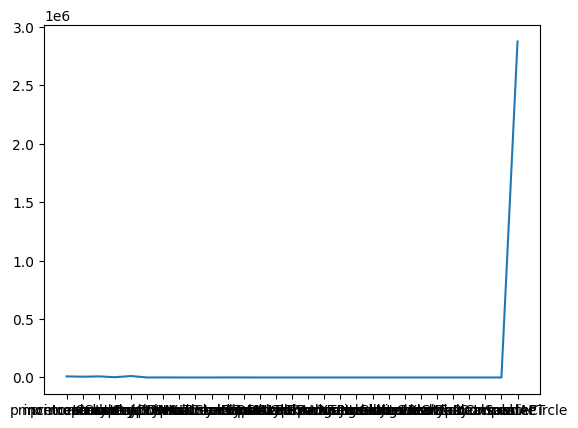

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = classes_dic.keys()
y = classes_dic.values()

print(x)
print(y)

plt.plot(x, y)
plt.show()

Since the distribution of classes is uneven. we need some normalization. And also when we are spliting the dataset we need to split it accordingly so that the distribution will not affect.

### 3. Spliting the dataset

### 3.1 For each class take X% as the train and Y% as test dataset. If the number of samples are less than 5 the we will consider all the samples for training in that case.

In [24]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install tqdm

In [25]:
# ! /home/rajat1/anaconda3/envs/col865/bin/pip install sklearn

In [26]:
train_per = 60
val_per = 40
test_per = 100 - train_per
threshold = 5

In [27]:
classes_dic_data = {}

tmp = dataset_without_id[:,:]


for i in tmp:
    if i[8] not in classes_dic_data.keys():
        classes_dic_data[i[8]] = []
    
    classes_dic_data[i[8]].append(i)

In [28]:
for i in classes_dic_data.keys():
    print(i, len(classes_dic_data[i]))

princetonCerber 9223
princetonLocky 6625
montrealCryptoLocker 9315
montrealCryptXXX 2419
paduaCryptoWall 12390
montrealWannaCry 28
montrealDMALockerv3 354
montrealCryptoTorLocker2015 55
montrealSamSam 62
montrealFlyper 9
montrealNoobCrypt 483
montrealDMALocker 251
montrealGlobe 32
montrealEDA2 6
paduaKeRanger 10
montrealVenusLocker 7
montrealXTPLocker 8
paduaJigsaw 2
montrealGlobev3 34
montrealJigSaw 4
montrealXLockerv5.0 7
montrealXLocker 1
montrealRazy 13
montrealCryptConsole 7
montrealGlobeImposter 55
montrealSam 1
montrealComradeCircle 1
montrealAPT 11
white 2875284


In [29]:
import sklearn
import sklearn.model_selection

test = []
train = []
val = []


import random

for i in classes_dic_data.keys():
    
    print(i, len(classes_dic_data[i]))
    
    if len(classes_dic_data[i]) < threshold:
        
        for j in classes_dic_data[i]:
            train.append(j)
            
    else:

        train_tt, test_t = sklearn.model_selection.train_test_split(classes_dic_data[i], shuffle=True, test_size = test_per/100)
        
        train_t, val_t = sklearn.model_selection.train_test_split(train_tt, shuffle=True, test_size = val_per/100)
        
        for j in train_t:
            train.append(j)
        
        for j in test_t:
            test.append(j)
        
        for j in val_t:
            val.append(j)

        

princetonCerber 9223
princetonLocky 6625
montrealCryptoLocker 9315
montrealCryptXXX 2419
paduaCryptoWall 12390
montrealWannaCry 28
montrealDMALockerv3 354
montrealCryptoTorLocker2015 55
montrealSamSam 62
montrealFlyper 9
montrealNoobCrypt 483
montrealDMALocker 251
montrealGlobe 32
montrealEDA2 6
paduaKeRanger 10
montrealVenusLocker 7
montrealXTPLocker 8
paduaJigsaw 2
montrealGlobev3 34
montrealJigSaw 4
montrealXLockerv5.0 7
montrealXLocker 1
montrealRazy 13
montrealCryptConsole 7
montrealGlobeImposter 55
montrealSam 1
montrealComradeCircle 1
montrealAPT 11
white 2875284


In [30]:
print("Train",len(train))
print("Test",len(test)) 
print("Val",len(val))
print("Total", len(train)+len(test)+len(val)) # 2916697

Train 1050002
Test 1166684
Val 700011
Total 2916697


In [34]:
train = np.array(train)
test = np.array(test)
val = np.array(val)

### 3.2 Dataset is preapared

In [35]:
def onehot_encoding(classes, val):
    lis = []
    
    cl_dic  = {}
    
    for i in range(len(classes)):
        cl_dic[classes[i]] = i
    
    for i in val:
        tm = [0]*len(classes)
        tm[cl_dic[i]] = 1
        lis.append(tm)
    return lis

def one_encoding(classes, val):
    lis = []
    
    cl_dic  = {}
    
    for i in range(len(classes)):
        cl_dic[classes[i]] = i
        
    for i in val:
        lis.append(cl_dic[i])
    return lis

In [36]:
# classes = list(classes_dic_data.keys())
# train_X = train[:,:-1].astype("float32")
# train_y = onehot_encoding(classes,train[:,-1])
# test_X = test[:,:-1].astype("float32")
# test_y = onehot_encoding(classes,test[:,-1])
# val_X = val[:,:-1].astype("float32")
# val_y = onehot_encoding(classes, val[:,-1])

In [37]:
classes = list(classes_dic_data.keys())
train_X = train[:,:-1].astype("float32")
train_y = one_encoding(classes,train[:,-1])
test_X = test[:,:-1].astype("float32")
test_y = one_encoding(classes,test[:,-1])
val_X = val[:,:-1].astype("float32")
val_y = one_encoding(classes,val[:,-1])

In [38]:
train_y = np.array(train_y)
print(train_y)
test_y = np.array(test_y)
val_y = np.array(val_y)

[ 0  0  0 ... 28 28 28]


In [39]:
print(train_X.shape)
print(train_y.shape)

(1050002, 8)
(1050002,)


In [40]:
print(val_X.shape)
print(val_y.shape)

(700011, 8)
(700011,)


In [41]:
train_X

array([[2.0160000e+03, 8.5000000e+01, 4.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 1.2500000e+08],
       [2.0160000e+03, 1.4800000e+02, 5.8000000e+01, ..., 0.0000000e+00,
        2.0000000e+00, 1.2500000e+08],
       [2.0160000e+03, 2.8200000e+02, 1.4400000e+02, ..., 0.0000000e+00,
        2.0000000e+00, 1.0000000e+08],
       ...,
       [2.0120000e+03, 2.2200000e+02, 1.4400000e+02, ..., 1.4070000e+03,
        2.0000000e+00, 1.0014240e+08],
       [2.0140000e+03, 1.1600000e+02, 4.0000000e+00, ..., 0.0000000e+00,
        2.0000000e+00, 5.0000000e+07],
       [2.0180000e+03, 9.2000000e+01, 1.4400000e+02, ..., 3.9340000e+03,
        2.0000000e+00, 2.5829937e+09]], dtype=float32)

In [42]:
train_y

array([ 0,  0,  0, ..., 28, 28, 28])

In [45]:
import torch
torch.cuda.is_available()

False

## Running the model

In [46]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


print(device)



from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

clf = TabNetClassifier(device_name=device)

clf.fit(
      train_X, 
      train_y,
      eval_set=[(val_X, val_y)],
      max_epochs = 5
)

preds = clf.predict(test_X)

cpu
Device used : cpu
epoch 0  | loss: 0.11717 | val_0_accuracy: 0.9858  |  0:01:22s
epoch 1  | loss: 0.07086 | val_0_accuracy: 0.9858  |  0:02:34s
epoch 2  | loss: 0.06917 | val_0_accuracy: 0.98579 |  0:03:56s
epoch 3  | loss: 0.0681  | val_0_accuracy: 0.9858  |  0:05:17s
epoch 4  | loss: 0.0675  | val_0_accuracy: 0.9858  |  0:06:39s
Stop training because you reached max_epochs = 5 with best_epoch = 0 and best_val_0_accuracy = 0.9858
Best weights from best epoch are automatically used!


### 1. training the model

In [47]:
print(clf.predict([test_X[0]]))
print(test_y[0])

[28]
0


### 2. testing the model

In [48]:
true_res = 0

res = clf.predict(test_X)

In [50]:
res

array([28, 28, 28, ..., 28, 28, 28])

In [51]:
for i in range(res.shape[0]):
    if(res[i] == test_y[i]):
        true_res +=1

accuracy = true_res/test_X.shape[0]
print(accuracy)

0.9857973538678854


### checking if we get right

In [52]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(30,30))
    #plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig("fig_1_t1.png")
    plt.show()

In [53]:
classes = list(set(test_y))

dic = {}
for i in range(len(classes)):
    dic[classes[i]] = i

cnf_array = []
for i in range(len(classes)):
    cnf_array.append([0]*len(classes))

for i in range(res.shape[0]):
    cnf_array[dic[test_y[i]]][dic[res[i]]]+=1

In [54]:
print(cnf_array)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3690], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2650], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3726], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 968], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4956], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 194], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 101], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13], [0, 0, 0, 0, 

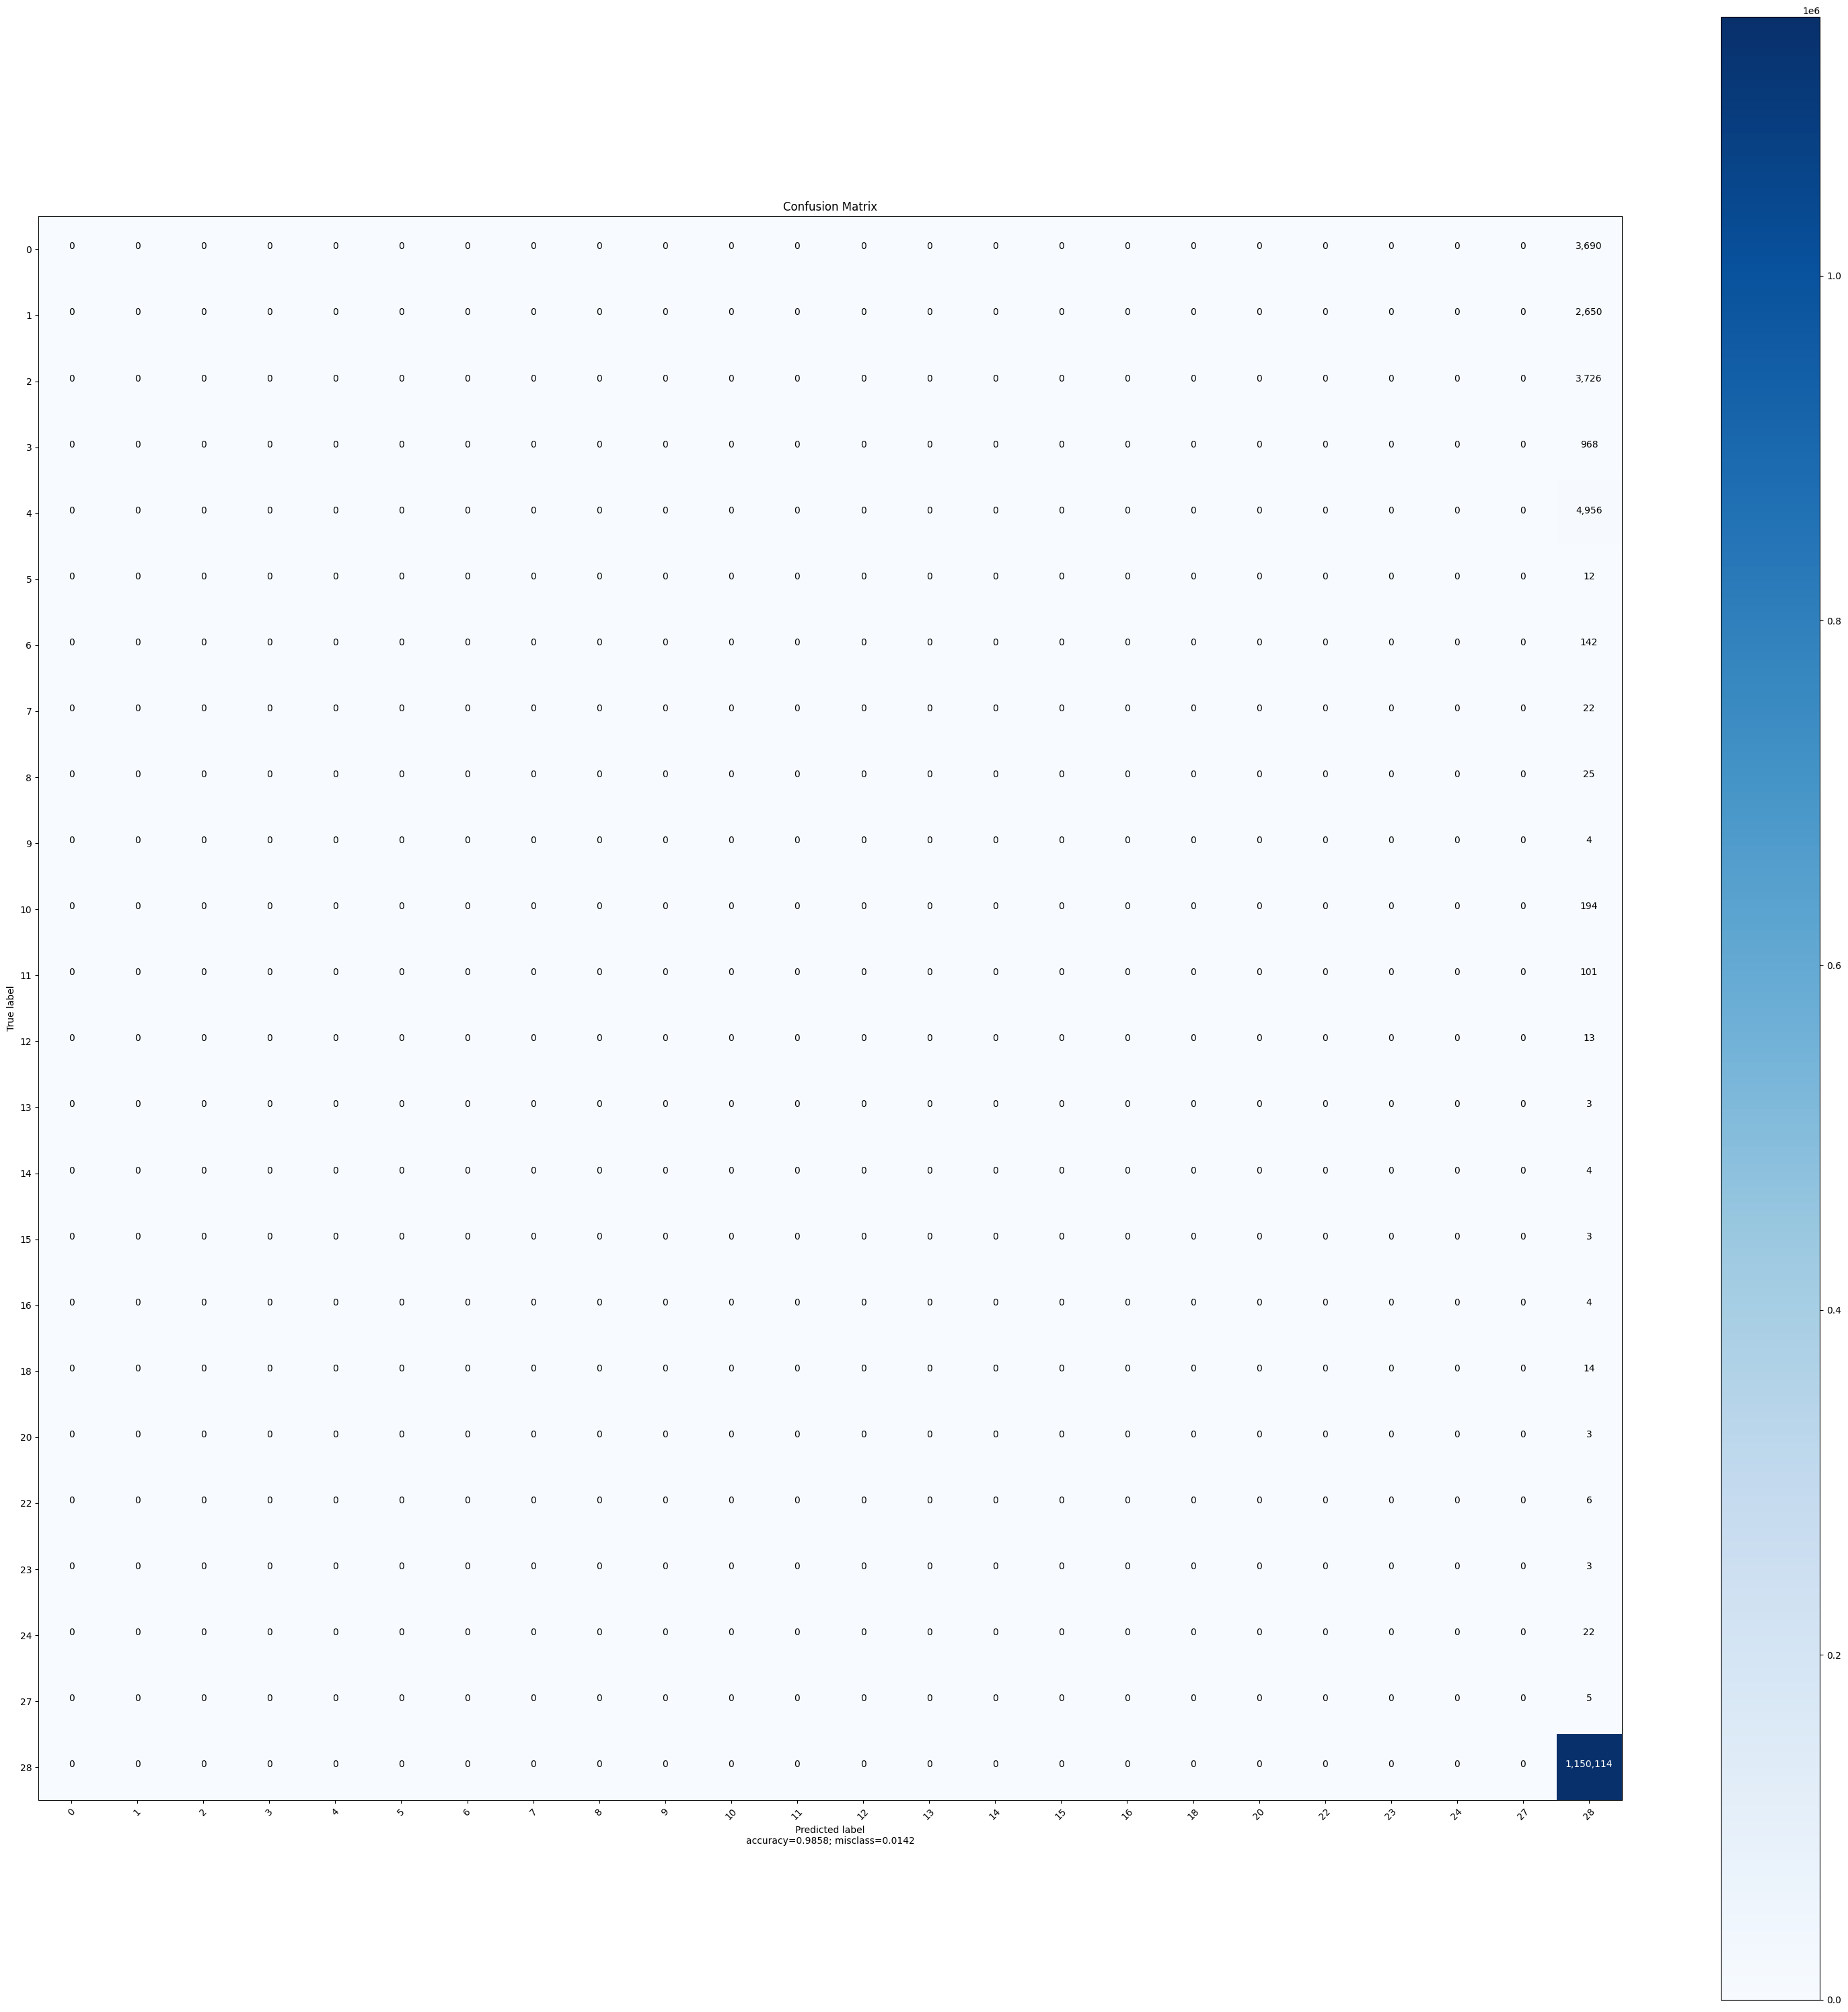

In [55]:
plot_confusion_matrix(cm= np.array(cnf_array), 
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")